<a href="https://colab.research.google.com/github/typewriter221/SIGNS/blob/master/SIGNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
%cd /content/drive/My Drive/Kaggle
# !kaggle datasets download -d datamunge/sign-language-mnist
# !ls
# ! unzip \*.zip && rm *.zip

/content/drive/My Drive/Kaggle


In [84]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [85]:
train = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv" )

In [86]:
y = test['label']
y_train = train['label'].values.reshape(-1,1)
y_test = test['label'].values.reshape(-1,1)

In [87]:

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [88]:
# import scipy
# encoder = OneHotEncoder()

# y_train2 = encoder.fit_transform(y_train)
# y_test2 = encoder.fit_transform(y_test)
# y_train2 = scipy.sparse.csr_matrix.toarray(y_train2)

In [89]:
del train['label']
del test['label']

In [90]:
x_train = train.values
x_test = test.values


In [91]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


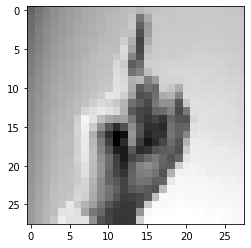

In [92]:

plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [93]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,rotation_range=0.3)
datagen.fit(x_train)

In [94]:
model = Sequential()
model.add(Conv2D(75,(3,3),strides=1,padding='same',activation='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2 , padding = 'same'))

model.add(Conv2D(25,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 50)         

In [95]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
with tf.device('/device:GPU:0'):
  history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 14s 66ms/step - loss: 1.2625 - accuracy: 0.6071 - val_loss: 3.3404 - val_accuracy: 0.1305
Epoch 2/20
215/215 [==============================] - 13s 61ms/step - loss: 0.2948 - accuracy: 0.9022 - val_loss: 1.5285 - val_accuracy: 0.5089
Epoch 3/20
215/215 [==============================] - 13s 61ms/step - loss: 0.1524 - accuracy: 0.9496 - val_loss: 0.2037 - val_accuracy: 0.9374
Epoch 4/20
215/215 [==============================] - 13s 62ms/step - loss: 0.0946 - accuracy: 0.9689 - val_loss: 2.1557 - val_accuracy: 0.5516
Epoch 5/20
215/215 [==============================] - 13s 61ms/step - loss: 0.0700 - accuracy: 0.9767 - val_loss: 0.0631 - val_accuracy: 0.9863
Epoch 6/20
215/215 [==============================] - 13s 60ms/step - loss: 0.0551 - accuracy: 0.9816 - val_loss: 0.1377 - val_accuracy: 0.9555
Epoch 7/20
215/215 [==============================] - 13s 61ms/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 0.4446 - val_accuracy:

In [96]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

7172/7172 [==============================] - 1s 197us/step
Accuracy of the model is -  100.0 %


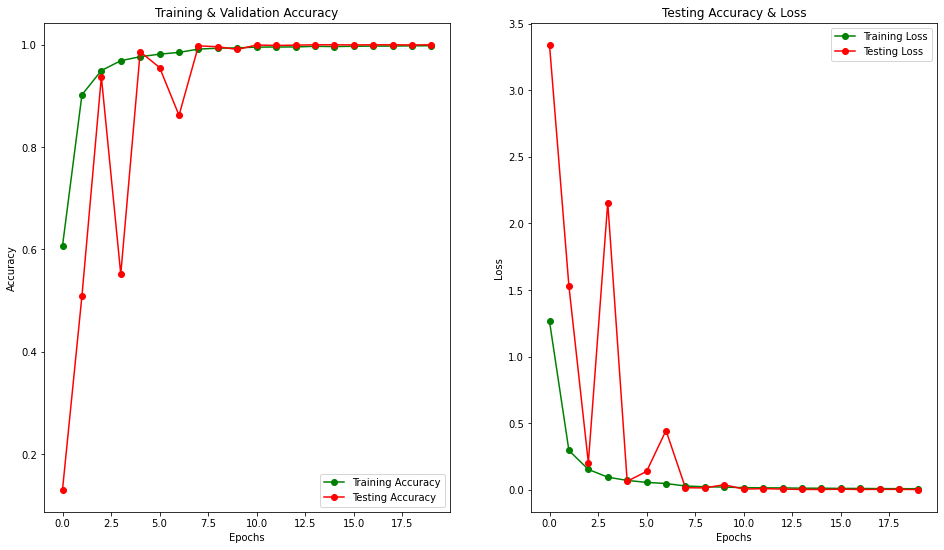

In [97]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [98]:
predictions = model.predict_classes(x_test)

for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]   

array([ 6,  5, 10,  0,  3])

In [99]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

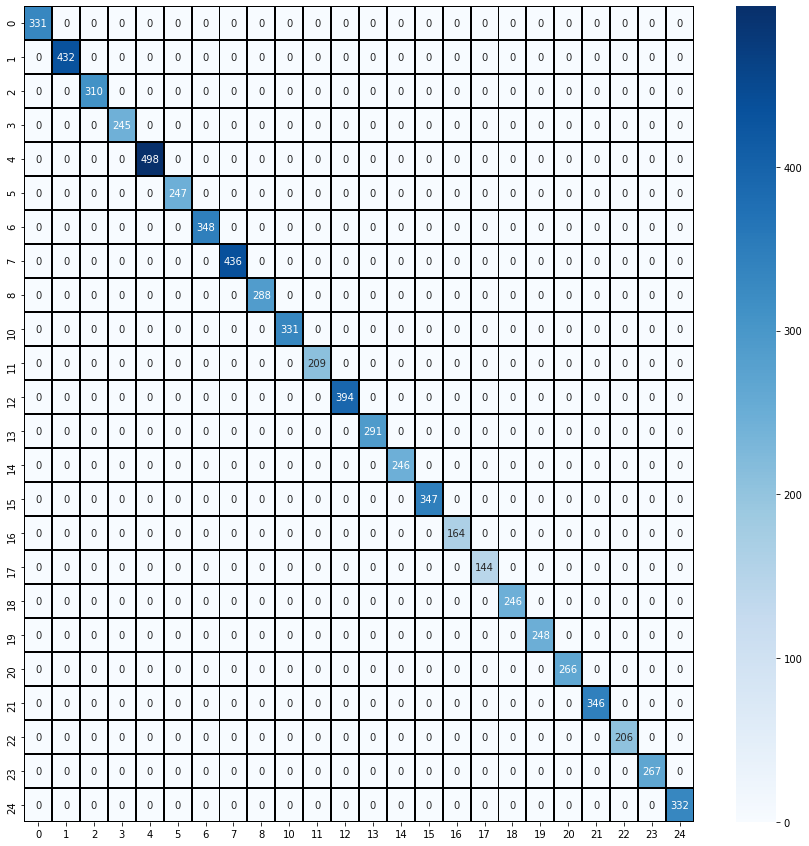

In [100]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')